In [14]:
import numpy as np
import matplotlib.pyplot as plt
import random
from random import randint

In [15]:
def plot_maze(H,V):
    plt.axis('off')
    plt.axis('equal')
    n = np.size(H,0)
    plt.plot([0,n,n,0,0], [0,0,n,n,0], color="k")
    
    for x in range(1,n): 
        for y in range(1,n+1):
            if V[x-1][y-1]==1:
                plt.plot([x,x], [y-1,y], color='k')
    for x in range(1,n+1):
        for y in range(1,n):
            if H[x-1][y-1]==1:
                plt.plot([x-1,x], [y,y], color="k")

In [16]:
# UNUSED

def direction(x,y,n):
    dir_list=["up","down","left","right"]
    if x==0:
        dir_list.remove("left")
    elif x==n:
        dir_list.remove("right")
    if y==0:
        dir_list.remove("up")
    elif y==n:
        dir_list.remove("down")
    return random.choice(dir_list)

    # dir_list=["u","d","l","r"]
    # if x==0:
    #     dir_list.remove("l")
    # elif visit[x-1][y]==1:
    #     if V[x-1][y]==1:
    #         dir_list.remove("l")
    # if x==n:
    #     dir_list.remove("r")
    # elif visit[x+1][y]==1:
    #     if V[x][y]==1:
    #         dir_list.remove("r")
    # if y==0:
    #     dir_list.remove("d")
    # elif visit[x][y+1]==1:
    #     if V[x][y]==1:
    #         dir_list.remove("d")
    # if y==n:
    #     dir_list.remove("u")
    # elif visit[x][y-1]==1:
    #     if V[x-1][y-1]==1:
    #         dir_list.remove("u")

    # dir=random.choice(dir_list)

In [17]:
# # i muri H vengono disegnati nel bordo superiore della cella corrente, quelli V nel bordo a dx
# #H è shiftato di 1 in basso, è una 5x4, V è una 4x5

# def dig(x,y, H,V,visit, done):
#     n=len(visit)-1
    
#     visit[x][y]=1 #aggiorno visit
#     #print("sono in:",x,y)
#     dir_list=["u","d","l","r"]
#     if x==0:
#         dir_list.remove("l")
#     elif visit[x-1][y]==1:
#         if V[x-1][y]==1:
#             dir_list.remove("l")
#     if x==n:
#         dir_list.remove("r")
#     elif visit[x+1][y]==1:
#         if V[x][y]==1:
#             dir_list.remove("r")
#     if y==n:
#         dir_list.remove("d")
#     elif visit[x][y+1]==1:
        
#         if H[x][y]==1:
#             dir_list.remove("d")
#     if y==0:
#         dir_list.remove("u")
#     elif visit[x][y-1]==1:
#         if H[x][y-1]==1:
#             dir_list.remove("u")
    
#     dir=random.choice(dir_list) #scegliamo direzione dopo il check
    

#     #rompiamo muri
#     if dir=="r":
#         V[x][y]=0
#         x+=1
#     elif dir=="l":
#         V[x-1][y]=0
#         x-=1
#     elif dir=="u":
#         H[x][y-1]=0
#         y-=1
#     elif dir=="d":
#         H[x][y]=0
#         y+=1
    
    
#     if visit==done:
#         return H,V,visit
#     elif visit != done:
#         return dig(x,y,H,V,visit,done)

In [18]:
# NON-RECURSIVE

def dig(x, y, H, V, visit, done):
    n = len(visit) - 1
    while visit != done:
        visit[x][y] = 1  # update visit
        # check available directions
        dir_list = ["u", "d", "l", "r"]
        if x == 0:
            dir_list.remove("l")
        elif visit[x - 1][y] == 1:
            if V[x - 1][y] == 1:
                dir_list.remove("l")
        if x == n:
            dir_list.remove("r")
        elif visit[x + 1][y] == 1:
            if V[x][y] == 1:
                dir_list.remove("r")
        if y == n:
            dir_list.remove("d")
        elif visit[x][y + 1] == 1:
            if H[x][y] == 1:
                dir_list.remove("d")
        if y == 0:
            dir_list.remove("u")
        elif visit[x][y - 1] == 1:
            if H[x][y - 1] == 1:
                dir_list.remove("u")
        
        dir = random.choice(dir_list)  # choose direction after the check

        # break walls
        if dir == "r":
            V[x][y] = 0
            x += 1
        elif dir == "l":
            V[x - 1][y] = 0
            x -= 1
        elif dir == "u":
            H[x][y - 1] = 0
            y -= 1
        elif dir == "d":
            H[x][y] = 0
            y += 1

    return H, V, visit

In [19]:
def init_H_V_visit(n):
    H=[[1 for i in range(n-1)]for x in range (n)]
    V=[[1 for i in range (n)]for x in range (n-1)]
    
    visit=[[0 for _ in range(n)] for _ in range(n)]

    return H,V,visit

In [20]:
def make_maze(n):
    H,V,visit=init_H_V_visit(n)
    done=[[1 for _ in range(n)] for _ in range(n)]
    H,V,visit=dig(0,0,H,V,visit,done)
    
    return H,V,visit

In [21]:
H,V,visit=make_maze(8)

In [22]:
# VERSIONE SENZA TRY

def recur(x1,y1,xnew,ynew,x2,y2,pathx,pathy,visit,H,V,attempts):
    n=len(H)-1
    
    visit.append((xnew,ynew))
    pathx.append(xnew)
    pathy.append(ynew)
    #print("i am in:",x,y)
    dir_list=["u","d","l","r"]
    
    #print('n=',n)
    # print('xnew,ynew=',xnew,ynew)
    # print('visit=',visit)
    # print('')
    
    if xnew==0 or (xnew-1,ynew) in visit:
        # print('MV remove L')
        dir_list.remove("l")

    elif V[xnew-1][n-ynew]==1:
        # print('W remove L')
        dir_list.remove("l")
    

    if xnew==n or (xnew+1,ynew) in visit:
        # print('MV remove R')
        dir_list.remove("r")

    elif V[xnew][n-ynew]==1:
        # print('W remove R')
        dir_list.remove("r")


    if ynew==n or (xnew,ynew+1) in visit:
        # print('MV remove D')
        dir_list.remove("d")
    
    elif H[xnew][n-1-ynew]==1:
        # print('W remove D')
        dir_list.remove("d")


    if ynew==0 or (xnew,ynew-1) in visit:
        # print('MV remove U')
        dir_list.remove("u")

    elif H[xnew][n-ynew]==1: #H e V partono dal basso a sx, ma le coordinate dell'array del maze dall'alto a sx
        # print('W remove U')
        dir_list.remove("u")
    
    #print(dir_list)


    if xnew==x2 and ynew==y2:
        return pathx,pathy,attempts
    elif dir_list==[]:
        visit=[]
        pathx=[]
        pathy=[]
        attempts+=1
        return recur(x1,y1,x1,y1,x2,y2,pathx,pathy,visit,H,V,attempts)
        

    dir=random.choice(dir_list) #scegliamo direzione dopo il check
    #print(dir)

    if dir=="r":
        xnew+=1
    elif dir=="l":
        xnew-=1
    elif dir=="u":
        ynew-=1
    elif dir=="d":
        ynew+=1
    # print(dir) 
    
    return recur(x1,y1,xnew,ynew,x2,y2,pathx,pathy,visit,H,V,attempts)

In [23]:
# # VERSION FOR CHATGPT

# def recur(x1,y1,xnew,ynew,x2,y2,pathx,pathy,visit,H,V,attempts):
#     n=len(H)-1
    
#     visit.append((xnew,ynew))
#     pathx.append(xnew)
#     pathy.append(ynew)
#     dir_list=["u","d","l","r"]
#     if xnew==0 or (xnew-1,ynew) in visit:
#         dir_list.remove("l")
#     elif V[xnew-1][n-ynew]==1:
#         dir_list.remove("l")
#     if xnew==n or (xnew+1,ynew) in visit:
#         dir_list.remove("r")
#     elif V[xnew][n-ynew]==1:
#         dir_list.remove("r")
#     if ynew==n or (xnew,ynew+1) in visit:
#         dir_list.remove("d")
#     elif H[xnew][n-1-ynew]==1:
#         dir_list.remove("d")
#     if ynew==0 or (xnew,ynew-1) in visit:
#         dir_list.remove("u")
#     elif H[xnew][n-ynew]==1:
#         dir_list.remove("u")
#     if xnew==x2 and ynew==y2:
#         return pathx,pathy,attempts
#     elif dir_list==[]:
#         visit=[]
#         pathx=[]
#         pathy=[]
#         attempts+=1
#         return recur(x1,y1,x1,y1,x2,y2,pathx,pathy,visit,H,V,attempts)
#     dir=random.choice(dir_list)
#     if dir=="r":
#         xnew+=1
#     elif dir=="l":
#         xnew-=1
#     elif dir=="u":
#         ynew-=1
#     elif dir=="d":
#         ynew+=1
#     return recur(x1,y1,xnew,ynew,x2,y2,pathx,pathy,visit,H,V,attempts)

In [24]:
# # BETTER RECURSIVE

# def recur(xold,yold,xnew,ynew,x2,y2,pathx,pathy,visit,H,V,attempts):
#     n=len(H)-1
    
#     visit.append((xnew,ynew))
#     pathx.append(xnew)
#     pathy.append(ynew)
#     #print("i am in:",x,y)
#     dir_list=["u","d","l","r"]
    
#     #print('n=',n)
#     # print('xnew,ynew=',xnew,ynew)
#     # print('visit=',visit)
#     # print('')
    
#     if xnew==0 or (xnew-1,ynew) in visit:
#         # print('MV remove L')
#         dir_list.remove("l")

#     elif V[xnew-1][n-ynew]==1:
#         # print('W remove L')
#         dir_list.remove("l")
    

#     if xnew==n or (xnew+1,ynew) in visit:
#         # print('MV remove R')
#         dir_list.remove("r")

#     elif V[xnew][n-ynew]==1:
#         # print('W remove R')
#         dir_list.remove("r")


#     if ynew==n or (xnew,ynew+1) in visit:
#         # print('MV remove D')
#         dir_list.remove("d")
    
#     elif H[xnew][n-1-ynew]==1:
#         # print('W remove D')
#         dir_list.remove("d")


#     if ynew==0 or (xnew,ynew-1) in visit:
#         # print('MV remove U')
#         dir_list.remove("u")

#     elif H[xnew][n-ynew]==1: #H e V partono dal basso a sx, ma le coordinate dell'array del maze dall'alto a sx
#         # print('W remove U')
#         dir_list.remove("u")
    
#     #print(dir_list)


#     if xnew==x2 and ynew==y2:
#         return pathx,pathy,attempts
#     elif dir_list==[]:
#         pathx.pop()
#         pathy.pop()
#         attempts+=1
#         return recur(xold,yold,xold,yold,x2,y2,pathx,pathy,visit,H,V,attempts)
        

#     dir=random.choice(dir_list) #scegliamo direzione dopo il check
#     #print(dir)

#     xold = xnew
#     yold = ynew

#     if dir=="r":
#         xnew+=1
#     elif dir=="l":
#         xnew-=1
#     elif dir=="u":
#         ynew-=1
#     elif dir=="d":
#         ynew+=1
#     # print(dir) 
    
#     return recur(xold,yold,xnew,ynew,x2,y2,pathx,pathy,visit,H,V,attempts)

In [25]:
def find_path(x1,y1,x2,y2,H,V):
    pathx=[]
    pathy=[]
    visit=[]
    attempts=1
    xnew,ynew=x1,y1
    pathx,pathy,attempts=recur(x1,y1,xnew,ynew,x2,y2,pathx,pathy,visit,H,V,attempts)
    
    return pathx,pathy,attempts

In [26]:
pathx,pathy,attempts=find_path(0,0,7,7,H,V)
print(pathx,'\n',pathy,'\n',attempts)

[0, 0, 1, 2, 2, 2, 2, 3, 4, 5, 5, 6, 6, 7, 7] 
 [0, 1, 1, 1, 2, 3, 4, 4, 4, 4, 5, 5, 6, 6, 7] 
 31


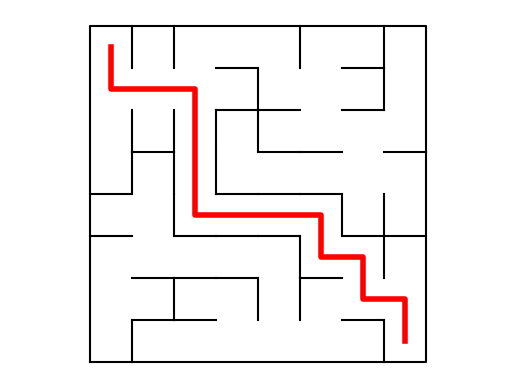

In [27]:
plot_maze(H,V);

x,y=pathx,[-i for i in pathy]
n=len(H)

plt.plot(np.add(x,[0.5 for i in range(np.size(x))]),
        np.subtract(y,[0.5 for i in range(np.size(y))])+n,
        color="r", linewidth=4);